<a href="https://colab.research.google.com/github/GHROTH-L/-ai-ml-training-/blob/main/marathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns #畫圖使用
%matplotlib inline

#將dataframe 上傳與下載下來
from google.colab import files

#計算日期相減
from dateutil.relativedelta import relativedelta
import datetime

'''
資料選自
https://aidea-web.tw/topic/107d9eb3-5a37-4303-9e60-11bebef82f51

'''


'\n資料選自\nhttps://aidea-web.tw/topic/107d9eb3-5a37-4303-9e60-11bebef82f51\n\n'

In [121]:
# 這個做 ONEHOT RECODING
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD ,Adam,Adagrad
from sklearn.metrics import log_loss 

In [4]:
uploaded = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
uploaded4 = files.upload()

Saving training-label.csv to training-label.csv


Saving train.csv to train.csv


Saving test.csv to test.csv


Saving submit_samples.csv to submit_samples.csv


In [93]:
train_label = pd.read_csv(io.BytesIO(uploaded['training-label.csv']))
train = pd.read_csv(io.BytesIO(uploaded2['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded3['test.csv']))
sample = pd.read_csv(io.BytesIO(uploaded4['submit_samples.csv']))

In [94]:
test

,mac_hash,sniffer_loc,created_time
0,00c41469578fb947de736d3a03900772,3,2018-12-06 17:21:18
1,0104474d9c1318b4f58a75fb605f39b2,10,2018-12-06 13:45:11
2,0104474d9c1318b4f58a75fb605f39b2,9,2018-12-06 13:45:11
3,0104474d9c1318b4f58a75fb605f39b2,11,2018-12-06 13:46:15
4,0104474d9c1318b4f58a75fb605f39b2,8,2018-12-06 13:46:15
...,...,...,...
20414,ffe0ad398b4769d715dd73cee58591de,11,2018-12-08 14:55:50
20415,ffe0ad398b4769d715dd73cee58591de,12,2018-12-08 14:55:51
20416,ffe0ad398b4769d715dd73cee58591de,4,2018-12-08 15:03:17
20417,ffe0ad398b4769d715dd73cee58591de,9,2018-12-08 15:14:34


In [95]:
#先把train 與train_label 合併
train_a = pd.merge(train, train_label, on=['mac_hash'] )
a_data = pd.concat([train_a, test]) # 將train與test合併
a_data

,mac_hash,sniffer_loc,created_time,label
0,0003ae8541d0e925fcee242287e2ad27,11,2018-12-07 16:48:08,0.0
1,00078611037990f7f36b722f22595fe7,3,2018-12-07 16:29:35,1.0
2,00078611037990f7f36b722f22595fe7,2,2018-12-07 16:30:41,1.0
3,00078611037990f7f36b722f22595fe7,4,2018-12-07 16:37:06,1.0
4,00078611037990f7f36b722f22595fe7,8,2018-12-07 16:37:07,1.0
...,...,...,...,...
20414,ffe0ad398b4769d715dd73cee58591de,11,2018-12-08 14:55:50,NaN
20415,ffe0ad398b4769d715dd73cee58591de,12,2018-12-08 14:55:51,NaN
20416,ffe0ad398b4769d715dd73cee58591de,4,2018-12-08 15:03:17,NaN
20417,ffe0ad398b4769d715dd73cee58591de,9,2018-12-08 15:14:34,NaN


In [96]:
a_data['created_time']= pd.to_datetime(a_data['created_time'])#將時間轉為time 格式利於計算

#製造總共單位

In [97]:
#計算總共到了幾個不同的點
a_data['num_d'] = a_data.groupby('mac_hash')['sniffer_loc'].transform('nunique')
a_data

,mac_hash,sniffer_loc,created_time,label,num_d
0,0003ae8541d0e925fcee242287e2ad27,11,2018-12-07 16:48:08,0.0,1
1,00078611037990f7f36b722f22595fe7,3,2018-12-07 16:29:35,1.0,8
2,00078611037990f7f36b722f22595fe7,2,2018-12-07 16:30:41,1.0,8
3,00078611037990f7f36b722f22595fe7,4,2018-12-07 16:37:06,1.0,8
4,00078611037990f7f36b722f22595fe7,8,2018-12-07 16:37:07,1.0,8
...,...,...,...,...,...
20414,ffe0ad398b4769d715dd73cee58591de,11,2018-12-08 14:55:50,NaN,11
20415,ffe0ad398b4769d715dd73cee58591de,12,2018-12-08 14:55:51,NaN,11
20416,ffe0ad398b4769d715dd73cee58591de,4,2018-12-08 15:03:17,NaN,11
20417,ffe0ad398b4769d715dd73cee58591de,9,2018-12-08 15:14:34,NaN,11


In [98]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62059 entries, 0 to 20418
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mac_hash      62059 non-null  object        
 1   sniffer_loc   62059 non-null  int64         
 2   created_time  62059 non-null  datetime64[ns]
 3   label         41640 non-null  float64       
 4   num_d         62059 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.8+ MB


<Axes: xlabel='label', ylabel='count'>

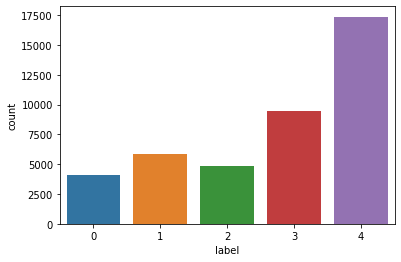

In [99]:
sns.countplot(data=train_a, x='label')

In [100]:
k = a_data.dropna()

<Axes: xlabel='num_d', ylabel='label'>

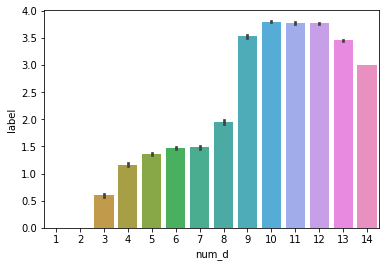

In [101]:
sns.barplot(x=k['num_d'], y=k['label'])

In [102]:
a_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62059 entries, 0 to 20418
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mac_hash      62059 non-null  object        
 1   sniffer_loc   62059 non-null  int64         
 2   created_time  62059 non-null  datetime64[ns]
 3   label         41640 non-null  float64       
 4   num_d         62059 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.8+ MB


#增加平均時間

In [103]:
b_data = a_data.groupby('mac_hash').agg(平均時間=('created_time', lambda x: (x.max()-x.min()).total_seconds() / 3600))
b_data

,平均時間
mac_hash,
0003ae8541d0e925fcee242287e2ad27,0.000000
00078611037990f7f36b722f22595fe7,25.017500
000ce31739b333d931813de403156844,1.465833
001befc6b70649b2c31d3bf9842c0142,0.000000
0027240b2aeb1f7f3c053c073cafb452,1.263056
...,...
ffcaf0f29c6bede7b5cd9bc807c31715,0.273611
ffd0c4403c3c44dcbe4772821b032252,0.805000
ffd7be58ee3c3fb47530ae7e4f251f88,0.000000


In [104]:
c_data = pd.merge(a_data,b_data, on =['mac_hash'])
c_data

,mac_hash,sniffer_loc,created_time,label,num_d,平均時間
0,0003ae8541d0e925fcee242287e2ad27,11,2018-12-07 16:48:08,0.0,1,0.000000
1,00078611037990f7f36b722f22595fe7,3,2018-12-07 16:29:35,1.0,8,25.017500
2,00078611037990f7f36b722f22595fe7,2,2018-12-07 16:30:41,1.0,8,25.017500
3,00078611037990f7f36b722f22595fe7,4,2018-12-07 16:37:06,1.0,8,25.017500
4,00078611037990f7f36b722f22595fe7,8,2018-12-07 16:37:07,1.0,8,25.017500
...,...,...,...,...,...,...
62054,ffb29a79ebd3034876cc20c3d553dda6,8,2018-12-08 15:38:36,NaN,10,2.045556
62055,ffc4b642af473f02057509a7cbf3d957,3,2018-12-08 10:08:09,NaN,4,0.939444
62056,ffc4b642af473f02057509a7cbf3d957,4,2018-12-08 10:08:10,NaN,4,0.939444
62057,ffc4b642af473f02057509a7cbf3d957,2,2018-12-08 10:08:10,NaN,4,0.939444


In [105]:
#增加星期幾
f_data = c_data.groupby('mac_hash').first().reset_index()
f_data['day']= f_data['created_time'].dt.dayofweek
f_data.sort_values(by='created_time')

,mac_hash,sniffer_loc,created_time,label,num_d,平均時間,day
1685,2a3cc8833e655ef8e857c4679f424d1b,5,2018-12-06 10:47:03,4.0,12,27.783056,3
8864,da90624ed99139efc65f668bc28837ea,5,2018-12-06 10:47:05,3.0,12,46.583333,3
7565,b9f2115a5bd03c91ed8308e32e256b78,10,2018-12-06 10:47:14,3.0,12,24.222778,3
6113,97f587da94842c6366364ac42f267f80,10,2018-12-06 10:47:16,3.0,14,6.762222,3
6710,a5758a7ef175ada72d306c7c583934ac,5,2018-12-06 10:47:20,3.0,11,1.251667,3
...,...,...,...,...,...,...,...
8083,c702f22b2a2a1d3535d4a46c9bc720ab,11,2018-12-08 17:58:23,0.0,1,0.000000,5
5056,7dec4098ac9d75df9d8144e9dbe06e20,11,2018-12-08 17:58:24,NaN,1,0.000000,5
2006,328e752ae706e0cab036eb60cb363603,11,2018-12-08 17:58:36,0.0,1,0.000000,5
6130,98708c20362062d822036edc0fcdaed9,13,2018-12-08 17:59:03,0.0,1,0.000000,5


#增加時段
##0900-1500 1500以後

In [141]:
def get_time_slot(date):
    # 取得小時
    hour = date.hour
    # 判斷時間段
    if hour >= 9 and hour < 15:
        return 0
    else:
        return 1

In [142]:
f_data['time_slot'] = f_data['created_time'].apply(get_time_slot)

In [143]:
f_data

,mac_hash,sniffer_loc,created_time,label,num_d,平均時間,day,time_slot
0,0003ae8541d0e925fcee242287e2ad27,11,2018-12-07 16:48:08,0.0,1,0.000000,4,1
1,00078611037990f7f36b722f22595fe7,3,2018-12-07 16:29:35,1.0,8,25.017500,4,1
2,000ce31739b333d931813de403156844,6,2018-12-06 14:44:29,3.0,14,1.465833,3,0
3,001befc6b70649b2c31d3bf9842c0142,5,2018-12-08 11:29:50,NaN,1,0.000000,5,0
4,0027240b2aeb1f7f3c053c073cafb452,10,2018-12-08 13:46:25,4.0,12,1.263056,5,0
...,...,...,...,...,...,...,...,...
10383,ffcaf0f29c6bede7b5cd9bc807c31715,3,2018-12-07 15:39:21,1.0,5,0.273611,4,1
10384,ffd0c4403c3c44dcbe4772821b032252,6,2018-12-08 16:45:22,4.0,13,0.805000,5,1
10385,ffd7be58ee3c3fb47530ae7e4f251f88,5,2018-12-08 16:46:46,0.0,1,0.000000,5,1
10386,ffe0ad398b4769d715dd73cee58591de,5,2018-12-07 18:52:22,NaN,11,20.575833,4,1


<Axes: xlabel='label', ylabel='time_slot'>

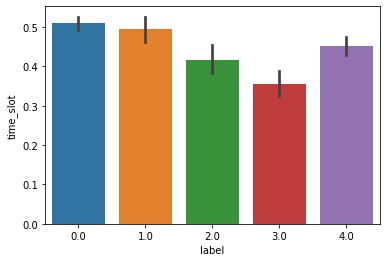

In [144]:
sns.barplot(x=f_data['label'], y=f_data['time_slot'])

<Axes: xlabel='label', ylabel='day'>

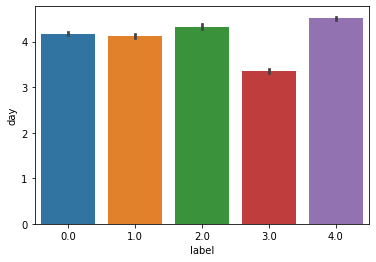

In [145]:
sns.barplot(x=f_data['label'], y=f_data['day'])

<Axes: xlabel='time_slot', ylabel='count'>

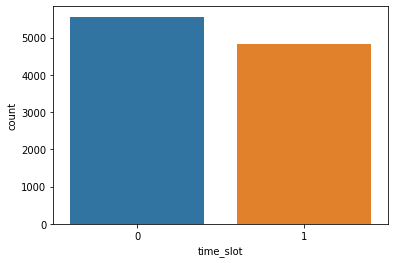

In [146]:
sns.countplot(data= f_data,x= 'time_slot')

In [147]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10388 entries, 0 to 10387
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   mac_hash      10388 non-null  object        
 1   sniffer_loc   10388 non-null  int64         
 2   created_time  10388 non-null  datetime64[ns]
 3   label         6959 non-null   float64       
 4   num_d         10388 non-null  int64         
 5   平均時間          10388 non-null  float64       
 6   day           10388 non-null  int64         
 7   time_slot     10388 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 649.4+ KB


#分開資料

In [194]:
train_x1 = f_data[f_data['label'].notnull()][['num_d','平均時間']].values
train_x2 =  f_data[f_data['label'].notnull()][['day','time_slot']].values
train_y = f_data[f_data['label'].notnull()]['label'].values
test_x = f_data[f_data['label'].isnull()][['mac_hash','num_d','平均時間','day']]
test_v1 = f_data[f_data['label'].isnull()][['num_d','平均時間']].values
test_v2 = f_data[f_data['label'].isnull()][['day','time_slot']].values

In [149]:
test_x['day'].unique()

array([5, 4, 3])

In [150]:
train_yo = to_categorical(train_y ,5)
train_yo

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [151]:
from sklearn import preprocessing
train_x1 = preprocessing.scale(train_x1) #這是Z分數標準化
test_v1 = preprocessing.scale(test_v1)

In [195]:
train_x = np.concatenate((train_x1, train_x2), axis=1)
test_v = np.concatenate((test_v1, test_v2),axis=1)

In [153]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_traino, y_testo = train_test_split(train_x, train_yo, test_size=0.3, random_state=69)

In [154]:
model = Sequential()
model.add(Dense(256, input_dim=4, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.087), 
              metrics=['accuracy'])

In [155]:
train_history=model.fit(x_train,y_traino,validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)

Epoch 1/10
29/29 [==============================] - 1s 17ms/step - loss: 1.2080 - accuracy: 0.5584 - val_loss: 0.9325 - val_accuracy: 0.5993
Epoch 2/10
29/29 [==============================] - 0s 14ms/step - loss: 0.8943 - accuracy: 0.6277 - val_loss: 0.7292 - val_accuracy: 0.6642
Epoch 3/10
29/29 [==============================] - 0s 13ms/step - loss: 0.7717 - accuracy: 0.6690 - val_loss: 0.6720 - val_accuracy: 0.6954
Epoch 4/10
29/29 [==============================] - 0s 14ms/step - loss: 0.6889 - accuracy: 0.7230 - val_loss: 0.5632 - val_accuracy: 0.7529
Epoch 5/10
29/29 [==============================] - 0s 14ms/step - loss: 0.6781 - accuracy: 0.7252 - val_loss: 0.5716 - val_accuracy: 0.7414
Epoch 6/10
29/29 [==============================] - 0s 15ms/step - loss: 0.6343 - accuracy: 0.7375 - val_loss: 0.5940 - val_accuracy: 0.6987
Epoch 7/10
29/29 [==============================] - 0s 15ms/step - loss: 0.6208 - accuracy: 0.7361 - val_loss: 0.6144 - val_accuracy: 0.7315
Epoch 8/10
29

In [156]:
score = model.evaluate(x_test, y_testo)
print('loss:', score[0])
print('正確率', score[1])

66/66 [==============================] - 0s 3ms/step - loss: 0.4845 - accuracy: 0.7778
loss: 0.48445945978164673
正確率 0.7777777910232544


In [157]:
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

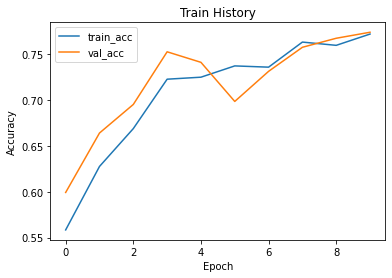

In [158]:
show_train_history('accuracy','val_accuracy')

In [159]:
#將預測繳交
dnn_pred =model.predict(test_v)
dnn_sub = pd.DataFrame(np.concatenate([sample['mac_hash'].values.reshape(3429,-1),dnn_pred],axis=1))
dnn_sub = dnn_sub.rename(columns={0:'mac_hash',1:'C0',2:'C1',3:'C2',4:'C3',5:'C4'})
dnn_sub.to_csv('dnn_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('dnn_sub.csv')

108/108 [==============================] - 0s 2ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [182]:
dnn_pred

array([[9.9527758e-01, 3.1025636e-03, 1.6163418e-03, 2.7463802e-06,
        8.6155359e-07],
       [9.9527758e-01, 3.1025636e-03, 1.6163418e-03, 2.7463802e-06,
        8.6155359e-07],
       [9.9380314e-01, 4.1911919e-03, 2.0029764e-03, 2.0604609e-06,
        7.3243012e-07],
       ...,
       [3.7747854e-04, 4.7541920e-02, 7.8851648e-02, 5.0319664e-02,
        8.2290930e-01],
       [1.8486243e-01, 5.1893103e-01, 2.9476789e-01, 3.1446642e-04,
        1.1242568e-03],
       [1.6567066e-04, 9.6698049e-03, 1.8703241e-02, 3.9309934e-01,
        5.7836193e-01]], dtype=float32)

#邏輯回歸

In [197]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=69)

In [ ]:
from sklearn import linear_model
model=linear_model.LogisticRegression()
model.fit(x_train,y_train)

In [185]:
# 預測測試集
y_pred = model.predict(x_test)

In [199]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.7954980842911877


In [188]:
r_pre = model.predict_proba(test_v)
r_sub = pd.DataFrame(np.concatenate([sample['mac_hash'].values.reshape(3429,-1),r_pre],axis=1))
r_sub = r_sub.rename(columns={0:'mac_hash',1:'C0',2:'C1',3:'C2',4:'C3',5:'C4'})
r_sub.to_csv('r_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('r_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
x_train

array([[ 0.90856227,  6.63827837,  3.        ,  0.        ],
       [-0.90115074, -0.27191641,  5.        ,  1.        ],
       [-0.44872249, -0.25812041,  5.        ,  1.        ],
       ...,
       [ 0.22991989, -0.22219332,  5.        ,  0.        ],
       [ 0.90856227, -0.04904531,  5.        ,  1.        ],
       [-0.67493661, -0.25746346,  5.        ,  1.        ]])

#Naive Bayes 分類器

In [200]:
from sklearn.naive_bayes import GaussianNB #用於連續變項
from sklearn.naive_bayes import MultinomialNB #類別變項
from sklearn.naive_bayes import BernoulliNB #二分類
modelm=MultinomialNB()
modelm.fit(x_train,y_train)
modelm.predict(x_test)


array([3., 0., 4., ..., 0., 3., 4.])

In [202]:
modelm.score(x_test,y_test)

0.6513409961685823

In [205]:
n_pre = modelm.predict_proba(test_v)
n_sub = pd.DataFrame(np.concatenate([sample['mac_hash'].values.reshape(3429,-1),n_pre],axis=1))
n_sub = n_sub.rename(columns={0:'mac_hash',1:'C0',2:'C1',3:'C2',4:'C3',5:'C4'})
n_sub.to_csv('n_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('n_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [206]:
n_sub

,mac_hash,C0,C1,C2,C3,C4
0,b882f1d44602a25349a08f4a0af32977,0.91247,0.057026,0.013589,0.000599,0.016317
1,86e644b498922f3a2fd0e6e1a1525de3,0.91247,0.057026,0.013589,0.000599,0.016317
2,691662b04ee08015062d901a4c5628b1,0.955545,0.032723,0.005724,0.000134,0.005874
3,52b5c510a28774237f4f118764c2ed6f,0.796331,0.122923,0.034717,0.002109,0.043919
4,9f3c995e53d109f532056b6eae29a0b5,0.000098,0.091937,0.011082,0.03317,0.863713
...,...,...,...,...,...,...
3424,5001c0dfe522886ed884c0dc4e5848df,0.302637,0.317494,0.077162,0.016267,0.28644
3425,f1c8781e701e89068fa0b8a62ecbc564,0.0,0.0,0.3788,0.6212,0.0
3426,646136b402e136422466a2acd8636630,0.002018,0.2396,0.099055,0.07084,0.588487
3427,c7bea6491029f86ab3d1f0f9b599ca2c,0.370097,0.322033,0.112027,0.012761,0.183083
